In [69]:
%matplotlib inline
from gensim.models import KeyedVectors
import estnltk
import pandas as pd
import numpy as np
from tqdm import tqdm
import itertools
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, linear_kernel, euclidean_distances
import operator
from joblib import Parallel, delayed
from sklearn.feature_extraction.text import TfidfVectorizer
import numba
import glob
# import pyemd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
model = KeyedVectors.load_word2vec_format('word2vec-models/lemmas.cbow.s100.w2v.bin', binary=True)

In [3]:
model

In [23]:
symmetric = False
window = 3
apple_contexts = open('../datasets/apple_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
rock_contexts = open('../datasets/rock_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
pear_contexts = open('../datasets/pear_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
contexts = apple_contexts + rock_contexts + pear_contexts
labels = [0]*len(apple_contexts) + [1]*len(rock_contexts) + [2]*len(pear_contexts)
# n = len(contexts)

s1, s2 = contexts[0].split(), contexts[2].split()

if len(s2) < len(s1):
    s1, s2 = s2, s1
m = len(s1)
n = len(s2)

m = len(s1)
n = len(s2)
sum_init=np.inf
comparison=operator.lt
metric=cosine_distances
# n = len(contexts)

In [24]:
s1, s2

(['eesti', 'jõudma', 'kauplusekett', 'tavaliselt'],
 ['õgima', 'säilitusaine', 'poola', 'hingama', 'sisse', 'mürgine'])

In [27]:
similarity_matrix = metric(model[s1], model[s2])

In [61]:
# %%timeit


# best_sum = sum_init
# for perm in itertools.permutations(list(range(n)), m):
#     perm_sum = 0
#     for i, j in enumerate(perm):
#         perm_sum += similarity_matrix[i,j]
#     if comparison(perm_sum, best_sum):
#         best_sum = perm_sum

# asd(similarity_matrix, m, n, sum_init)

In [32]:
# @numba.jit(nopython=True)
# def asd(similarity_matrix, m, n, sum_init):
#     best_sum = sum_init
#     for perm in itertools.permutations(list(range(n)), m):
#         perm_sum = 0
#         for i, j in enumerate(perm):
#             perm_sum += similarity_matrix[i,j]
#         if comparison(perm_sum, best_sum):
#             best_sum = perm_sum
#     return best_sum

def alignement_cos_metric_contexts(s1, s2, sum_init, comparison, metric):
    if type(s1) == str:
        s1 = s1.split()
        s2 = s2.split()
    
    if len(s2) < len(s1):
        s1, s2 = s2, s1
    m = len(s1)
    n = len(s2)

#     similarity_matrix = np.empty((m,n))
#     similarity_matrix[:] = np.NAN

#     for i, w1 in enumerate(s1):
#         for j, w2 in enumerate(s2):
#             similarity_matrix[i,j] = metric([model[w1]], [model[w2]])[0]

    similarity_matrix = metric(model[s1], model[s2])
    
    best_sum = sum_init
    for perm in itertools.permutations(list(range(n)), m):
        perm_sum = 0
        for i, j in enumerate(perm):
            perm_sum += similarity_matrix[i,j]
        if comparison(perm_sum, best_sum):
            best_sum = perm_sum

    return best_sum/m
    
def alignement_cos_sim_contexts(s1, s2):
    return alignement_cos_metric_contexts(s1, s2, 
                        sum_init=-np.inf,
                        comparison=operator.gt,
                        metric=cosine_similarity)

    
def alignement_cos_dist_contexts(s1, s2):
    return alignement_cos_metric_contexts(s1, s2, 
                        sum_init=np.inf,
                        comparison=operator.lt,
                        metric=cosine_distances)


def alignement_matrix_row_dist(s1, s1_index, contexts, row_length):
    row = np.zeros(row_length)
    for j in range(s1_index+1):
        s2 = contexts[j]
        row[j] = alignement_cos_dist_contexts(s1, s2)
    return row


def alignement_matrix_row_sim(s1, s1_index, contexts, row_length):
    row = np.zeros(row_length)
    for j in range(s1_index+1):
        s2 = contexts[j]
        row[j] = alignement_cos_sim_contexts(s1, s2)
    return row

In [191]:
symmetric = False
window = 3
print(window, symmetric, func, name)
apple_contexts = open('../datasets/apple_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
rock_contexts = open('../datasets/rock_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
pear_contexts = open('../datasets/pear_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
contexts = apple_contexts + rock_contexts + pear_contexts
labels = [0]*len(apple_contexts) + [1]*len(rock_contexts) + [2]*len(pear_contexts)
n = len(contexts)

# distance_matrix_rows = Parallel(n_jobs=1)(delayed(alignement_matrix_row_sim)(s1, s1_index, contexts, n) 
#                                            for s1_index, s1 in tqdm(enumerate(contexts)))
# distance_matrix_partial = np.array(distance_matrix_rows)
# distance_matrix = distance_matrix_partial + distance_matrix_partial.T
# if func.__name__ == alignement_matrix_row_sim.__name__:
#     np.fill_diagonal(distance_matrix, 1)
# if func.__name__ == alignement_matrix_row_dist.__name__.:
#     np.fill_diagonal(distance_matrix, 0)

3 False <function alignement_matrix_row_dist at 0x7fa35527dae8> dist


In [193]:
len(contexts)

11801

In [52]:
asd = distance_matrix2 + distance_matrix2.T
np.fill_diagonal(asd, 1)
np.allclose(distance_matrix1, asd)
for func, name in [(alignement_matrix_row_dist, 'dist'), (alignement_matrix_row_sim, 'sim')]:
    print(1
        )

1
1


In [ ]:
#alustas 6:40
for window in [3,2,4]:
    for symmetric in [True, False]:
        for func, name in [(alignement_matrix_row_dist, 'dist'), (alignement_matrix_row_sim, 'sim')]:
    #         symmetric = True
    #         window = 4
            print(window, symmetric, func, name)
            apple_contexts = open('../datasets/apple_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
            rock_contexts = open('../datasets/rock_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
            pear_contexts = open('../datasets/pear_contexts_s_{}_w_{}.txt'.format(symmetric, window)).read().splitlines()
            contexts = apple_contexts + rock_contexts + pear_contexts
            labels = [0]*len(apple_contexts) + [1]*len(rock_contexts) + [2]*len(pear_contexts)
            n = len(contexts)

            distance_matrix_rows = Parallel(n_jobs=20)(delayed(func)(s1, s1_index, contexts, n) 
                                                                    for s1_index, s1 in enumerate(contexts))
            distance_matrix = np.array(distance_matrix_rows)
            
            distance_matrix_partial = np.array(distance_matrix_rows)
            distance_matrix = distance_matrix_partial + distance_matrix_partial.T
            if func.__name__ == alignement_matrix_row_sim.__name__:
                print('sim diag')
                np.fill_diagonal(distance_matrix, 1)
            if func.__name__ == alignement_matrix_row_dist.__name__:
                print('dist diag')
                np.fill_diagonal(distance_matrix, 0)
            
            filename = '../datasets/apple-rock-pear/alignement_{}_w_{}_s_{}.npy'.format(name, window, symmetric)

            np.save(filename, distance_matrix)

3 True <function alignement_matrix_row_dist at 0x7fa35527dae8> dist


In [ ]:
# check max_distances

In [91]:
for dist_file in glob.glob('../datasets/apple-rock-pear/*dist*'):
    dist = np.load(dist_file)
    print(dist_file)
    if dist[dist>1].any():
        print('ABOVE 1', dist_file)

../datasets/apple-rock-pear/alignement_dist_w_3_s_True.npy


/media/cdata-work/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


ABOVE 1 ../datasets/apple-rock-pear/alignement_dist_w_3_s_True.npy
../datasets/apple-rock-pear/tfidf_cosine_distances_w_3_s_True.npy
../datasets/apple-rock-pear/clipped_cos_dist_w_2_s_False.npy
../datasets/apple-rock-pear/cos_dist_w_3_s_False.npy
ABOVE 1 ../datasets/apple-rock-pear/cos_dist_w_3_s_False.npy
../datasets/apple-rock-pear/tfidf_cosine_distances_w_2_s_False.npy
../datasets/apple-rock-pear/clipped_cos_dist_w_4_s_True.npy
../datasets/apple-rock-pear/tfidf_cosine_distances_w_4_s_False.npy
../datasets/apple-rock-pear/clipped_cos_dist_w_3_s_True.npy
../datasets/apple-rock-pear/cos_dist_w_2_s_False.npy
ABOVE 1 ../datasets/apple-rock-pear/cos_dist_w_2_s_False.npy
../datasets/apple-rock-pear/alignement_dist_w_2_s_False.npy
ABOVE 1 ../datasets/apple-rock-pear/alignement_dist_w_2_s_False.npy
../datasets/apple-rock-pear/cos_dist_w_4_s_False.npy
ABOVE 1 ../datasets/apple-rock-pear/cos_dist_w_4_s_False.npy
../datasets/apple-rock-pear/cos_dist_w_3_s_True.npy
ABOVE 1 ../datasets/apple-rock

In [110]:
filename = '../datasets/apple-rock-pear/alignement_dist_w_3_s_False.npy'
dist = np.load(filename)

dist[dist>1].shape

dist.shape[0]*dist.shape[0]

3091738/139263601

/media/cdata-work/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in greater


0.02220061794897864

In [261]:
filename = '../datasets/apple-rock-pear/alignement_sim_w_3_s_False.npy'
sim = np.load(filename)

sim[sim>1].shape


(4716,)

In [337]:
for sim_filename in glob.glob('../datasets/apple-rock-pear/alignement_sim_*'):
    print(sim_filename, sim_filename.replace('sim', 'dist'))
    dist_filename = sim_filename.replace('sim', 'dist')
    sim = np.load(sim_filename)
    dist = 1-sim
    np.save(dist_filename, dist)

../datasets/apple-rock-pear/alignement_sim_w_3_s_False.npy ../datasets/apple-rock-pear/alignement_dist_w_3_s_False.npy
../datasets/apple-rock-pear/alignement_sim_w_3_s_True.npy ../datasets/apple-rock-pear/alignement_dist_w_3_s_True.npy
../datasets/apple-rock-pear/alignement_sim_w_2_s_False.npy ../datasets/apple-rock-pear/alignement_dist_w_2_s_False.npy
../datasets/apple-rock-pear/alignement_sim_w_2_s_True.npy ../datasets/apple-rock-pear/alignement_dist_w_2_s_True.npy


In [309]:
sim = np.load(sim_filename)
dist = np.load(sim_filename.replace('sim', 'dist').replace('/alig', '/backup/alig'))

In [320]:
sim[sim<0].shape

(979638,)

In [321]:
979638/(sim.shape[0]**2)

0.008515105590341123

In [322]:
filename = '../datasets/apple-rock-pear/alignement_sim_w_2_s_True.npy'
sim2 = np.load(filename)
filename = '../datasets/apple-rock-pear/alignement_dist_w_2_s_True.npy'
dist2 = np.load(filename)



In [327]:
np.allclose(sim2, 1-dist2)

True

In [333]:
sim2.shape, dist2.shape

((9620, 9620), (10726, 10726))

In [339]:
for window in [3,2]:
    for symmetric in [True, False]:
        filename = '../datasets/apple-rock-pear/alignement_sim_w_{}_s_{}.npy'.format(window, symmetric)
        sim2 = np.load(filename)
        print(filename, sim2.shape)
        filename = '../datasets/apple-rock-pear/alignement_dist_w_{}_s_{}.npy'.format(window, symmetric)
        dist2 = np.load(filename)
        print(filename, dist2.shape)
        print(np.allclose(sim2, 1-dist2))

../datasets/apple-rock-pear/alignement_sim_w_3_s_True.npy (9620, 9620)
../datasets/apple-rock-pear/alignement_dist_w_3_s_True.npy (9620, 9620)
True
../datasets/apple-rock-pear/alignement_sim_w_3_s_False.npy (11801, 11801)
../datasets/apple-rock-pear/alignement_dist_w_3_s_False.npy (11801, 11801)
True
../datasets/apple-rock-pear/alignement_sim_w_2_s_True.npy (10726, 10726)
../datasets/apple-rock-pear/alignement_dist_w_2_s_True.npy (10726, 10726)
True
../datasets/apple-rock-pear/alignement_sim_w_2_s_False.npy (12097, 12097)
../datasets/apple-rock-pear/alignement_dist_w_2_s_False.npy (12097, 12097)
True


In [348]:
sim2[sim2<0].shape[0]/sim2.shape[0]**2

0.011455799384831256

In [350]:
for file in glob.glob('../datasets/apple-rock-pear/*'):
    print(file)
    arr = np.load(file)
    min_f = arr[arr<0].shape[0]/arr.shape[0]**2
    max_f = arr[arr>1].shape[0]/arr.shape[0]**2
    print('max {} ({}), min {} ({})'.format(np.max(arr), max_f, np.min(arr), min_f))

../datasets/apple-rock-pear/alignement_dist_w_3_s_True.npy
max 1.2121040634810925 (0.0019052692545416037), min -2.384185791015625e-07 (1.9342067159114975e-05)
../datasets/apple-rock-pear/tfidf_cosine_distances_w_3_s_True.npy
max 1.0 (0.0), min 0.0 (0.0)
../datasets/apple-rock-pear/tfidf_cosine_similarity_w_4_s_True.npy
max 1.0000000000000004 (4.902363923508069e-05), min 0.0 (0.0)
../datasets/apple-rock-pear/cos_sim_w_2_s_False.npy
max 1.0 (0.0), min -0.5705318450927734 (0.08919834025488316)
../datasets/apple-rock-pear/tfidf_cosine_similarity_w_2_s_False.npy
max 1.0000000000000004 (3.411977862748684e-05), min 0.0 (0.0)
../datasets/apple-rock-pear/alignement_sim_w_3_s_False.npy
max 1.000000238418579 (3.386383783081984e-05), min -0.37082311511039734 (0.003673292923109176)
../datasets/apple-rock-pear/cos_dist_w_3_s_False.npy
max 1.6227898597717285 (0.06816227594172292), min 0.0 (0.0)
../datasets/apple-rock-pear/alignement_sim_w_3_s_True.npy
max 1.000000238418579 (1.9342067159114975e-05), m

IsADirectoryError: [Errno 21] Is a directory: '../datasets/apple-rock-pear/backup'

In [361]:
for file in glob.glob('../datasets/apple-rock-pear/alig*sim*') + glob.glob('../datasets/apple-rock-pear/cos*sim*'):
    print(file)
    sim = np.load(file)
    sim[sim<0] = 0
    np.save(file, sim)

../datasets/apple-rock-pear/alignement_sim_w_3_s_False.npy
../datasets/apple-rock-pear/alignement_sim_w_3_s_True.npy
../datasets/apple-rock-pear/alignement_sim_w_2_s_False.npy
../datasets/apple-rock-pear/alignement_sim_w_2_s_True.npy
../datasets/apple-rock-pear/cos_sim_w_2_s_False.npy
../datasets/apple-rock-pear/cos_sim_w_4_s_True.npy
../datasets/apple-rock-pear/cos_sim_w_3_s_True.npy
../datasets/apple-rock-pear/cos_sim_w_2_s_True.npy
../datasets/apple-rock-pear/cos_sim_w_3_s_False.npy
../datasets/apple-rock-pear/cos_sim_w_4_s_False.npy


In [29]:
s1 = 'kes see on'
s2 = 'mis see on'

In [39]:
model.wmdistance(s1, s2)

4.534144507413864

In [33]:
alignement_cos_sim_contexts(s1, s2), alignement_cos_dist_contexts(s1, s2)

(0.89924401044845581, 0.10075618823369344)

In [38]:
alignement_cos_metric_contexts(s1, s2, 
                        sum_init=np.inf,
                        comparison=operator.lt,
                        metric=euclidean_distances)

4.9630372483904166

In [165]:
contexts1 = open('../datasets/tee_sõidu_contexts_s_True_w_3.txt').read().splitlines()
contexts2 = open('../datasets/tee_jook_contexts_s_True_w_3.txt').read().splitlines()
contexts = contexts1 + contexts2   

In [117]:
custom_wmd = []
gensim_wmd = []
c1 = contexts[0]
for c in tqdm(contexts):
#     custom_wmd.append(alignement_cos_metric_contexts(c1, c, 
#                         sum_init=np.inf,
#                         comparison=operator.lt,
#                         metric=euclidean_distances))
#     gensim_wmd.append(model.wmdistance(c1.split(), c.split()))
    print(alignement_cos_metric_contexts(c1, c, 
                        sum_init=np.inf,
                        comparison=operator.lt,
                        metric=euclidean_distances),model.wmdistance(c1.split(), c.split()))

  2%|▏         | 30/1394 [00:00<00:04, 295.00it/s]

0.00614504748955 0.0
24.1441822052 24.144190423217776
22.3098640442 22.30985956700325
21.1138138771 21.113818520500182
19.750338316 19.750340102748872
23.3878073692 23.387805554857255
22.3130712509 22.313070702884197
24.3968558311 24.396852013373852
17.4381039143 17.43810702956009
21.6400825977 21.640083193737983
20.1789999008 20.179003977941512
21.9719252586 21.97192564641714
24.1218447685 24.121840367451192
26.7697620392 26.76976627901268
20.4579758644 20.45797225879669
20.3128261566 20.31282124562073
20.9780888557 20.97808349876404
22.0690588951 22.06906008927154
25.4142317772 25.414241669757843
21.6488275528 21.648828184035303
20.4182116985 20.418216379730225
19.3104908466 19.310492104994772
24.7284989357 24.728501850090026
23.9035334587 23.90353048756027
21.5000433922 21.500039486555103
20.5856571198 20.58566016357279
22.867202282 22.8672009434309
22.661261797 22.661264186862944
23.9693832397 23.96938322522688
22.6741905212 22.674190268221377
19.7705550194 19.77055637505722
21.656

  8%|▊         | 118/1394 [00:00<00:04, 290.58it/s]

 20.258262657767773
23.7736930847 23.77368599408054
24.3516392708 24.351641921839715
19.4691307545 19.469126452281476
24.1974525452 24.1974548223114
25.1948251724 25.19483121780014
23.7892208099 23.78922250740719
21.4233663082 21.423364939818384
22.7845401764 22.784540286174774
24.641228199 24.641225674415587
22.7513198853 22.75132690398455
23.5546255112 23.554630129665377
23.8718276024 23.871831526555063
17.4912142754 17.491203314105988
24.6072616577 24.60725920882511
20.9147222042 20.914723482151032
23.4313716888 23.431366687288282
25.1065716743 25.106572607686044
23.1802411079 23.180241000520706
22.5914855003 22.591480853578567
16.6717705727 16.671765166152
21.418387413 21.41838637760162
22.7598671913 22.75985668791962
22.2680997849 22.268100216890335
23.0543169975 23.05431735936356
22.1939640045 22.193957323819163
22.4794912338 22.479486460113524
24.5431723595 24.543175516507624
22.5948996544 22.594898029559136
20.1966683865 20.196669874523163
25.519888401 25.51988353410244
22.2329

 13%|█▎        | 175/1394 [00:00<00:04, 285.58it/s]

19.990207463174343
21.1465315819 21.14653304803133
17.9930391312 17.99304181967926
23.3846120834 23.384603564993856
18.7540066242 18.75400107502937
20.2140874863 20.21408607463741
24.0778074265 24.077806266288757
23.2324962616 23.232494612998963
22.8854646683 22.88546245101261
19.1106209755 19.110617899942397
25.2713365555 25.271338927898405
20.8218007088 20.821804221153258
24.9226651192 24.922665194625377
21.4657912254 21.46579381499147
24.0988025665 24.09879957450676
24.095952034 24.095952544989583
22.7869906425 22.78698826043701
25.2072854042 25.207283726069928
21.766043663 21.766040832386018
20.8126802444 20.81267932635784
22.696574688 22.696571619606974
23.0554795265 23.055475970587732
24.7365612984 24.736552575912476
24.1474151611 24.14742181696701
24.1977462769 24.197747910731316
21.7495503426 21.749551919204713
21.8053052425 21.805307132635118
20.624997139 20.624993783894062
22.5217700005 22.52176708401918
20.6161930561 20.616196788589956
26.2979545593 26.297964864387513
19.395

 17%|█▋        | 232/1394 [00:00<00:04, 281.04it/s]

 22.5625863935895
23.6311535835 23.63115408770609
23.4761190414 23.47611437455368
23.3864269257 23.38642571811581
24.389598608 24.389597526763914
21.3301458359 21.33015061707401
19.2686595917 19.26865823881531
22.1796216965 22.179617198753355
20.5239887238 20.5239851298995
19.2328078747 19.232807649936678
23.8543539047 23.854356671954157
23.1483421326 23.14834799534893
22.8276267052 22.82762431180525
18.9846282005 18.9846255131073
20.6438467503 20.643853596317292
22.683816433 22.68382259613037
20.3928842545 20.39288243628025
21.715241909 21.715240967735287
18.8559622765 18.85596274164772
20.5344777107 20.534477791677475
23.9753441811 23.97534490548849
23.1928253174 23.192816779804232
22.8220062256 22.822001378579614
22.1635808945 22.163576919441223
22.5554790497 22.5554754508152
22.5925607681 22.592561341926572
26.0619220734 26.06191889300346
21.6712636948 21.671265525839807
19.5245797634 19.524581695846557
23.2120218277 23.21202159942198
25.277782917 25.277783817443847
23.2037987709 2

 23%|██▎       | 319/1394 [00:01<00:03, 283.15it/s]

21.5564351082 21.55643569100857
26.7018857002 26.70188217554855
24.319881916 24.319882412264345
22.949801445 22.949799280218127
23.0419704914 23.041968124644754
22.1110281944 22.11102622718811
21.9837055206 21.98370154411793
24.4441933632 24.44419657204628
21.9167256355 21.91671937582016
22.4723572731 22.472352769533632
23.9410386086 23.941037345891
23.5858006477 23.585801405921938
22.657623291 22.65762598464203
23.3653535843 23.365356463230132
25.0711860657 25.07117665482044
23.2725195885 23.272522598075867
20.5805344582 20.580540967764854
21.7271771431 21.727183746391294
23.9312419891 23.931239387554648
22.8215503693 22.821550765373228
23.6760134697 23.67601331562996
25.9183554649 25.91835637377453
19.1962275505 19.196227859384535
22.3097801208 22.309780346699714
22.0294837952 22.029483469576835
21.7534122467 21.75340977430344
23.478225708 23.478220307319162
22.6088700294 22.60886455063486
24.1365184784 24.136522277784348
22.3769388199 22.37694330395651
23.0800747871 23.0800761683349

 27%|██▋       | 377/1394 [00:01<00:03, 281.27it/s]

 22.358063043342593
24.4181194305 24.41811998375988
19.4103939533 19.41039316982174
22.5566239357 22.556616693574906
25.0872592926 25.08725774957657
23.770793438 23.770795993652342
21.0192632675 21.019260336408617
23.9154038429 23.915409802393913
24.8011131287 24.801107181197644
22.1305904388 22.130592089447024
23.899266243 23.899265235139847
19.0411086082 19.041108765065193
23.7042822838 23.704291166833876
21.8922095299 21.89220775844288
22.6317877769 22.63178700079155
22.4596319199 22.459627823618888
20.8913624287 20.891363017957687
24.841070652 24.841068713140487
21.583363533 21.58336222752571
19.826164484 19.82616804001522
19.8640289307 19.864026003098488
26.0963778496 26.096377607383726
20.0253500938 20.025360140962125
20.1736698151 20.173671288391112
22.6092422009 22.60924606936884
24.2648415565 24.26484352324009
21.6391301155 21.63912607583237
23.9915819168 23.991584950823782
20.5272040367 20.527199971039295
26.4585456848 26.45855662204742
21.6651368141 21.66513766419411
21.3973

 33%|███▎      | 465/1394 [00:01<00:03, 284.22it/s]

 23.090278023643492
19.5419440269 19.541944300368307
19.4670646191 19.46706376028442
22.2396392822 22.239639175999166
23.6995134354 23.69951142565441
22.1151685715 22.115174515353683
24.5747489929 24.574750075995922
22.221016407 22.221013087997914
20.287566185 20.287563372969153
22.7240996361 22.72410045202303
22.8181049824 22.818103002905847
25.1291050911 25.129101664150237
22.1025929451 22.102590653327464
20.2298972607 20.229900319293023
23.7563271523 23.75632417325974
18.7850835323 18.785082075725555
21.7399175167 21.73991759484482
22.2181110382 22.218107573540685
23.2141656876 23.214175288071633
22.9925985336 22.99260667465687
24.2081766129 24.208179124183655
25.6432380676 25.64324073238182
20.2893006802 20.289298020883084
18.9383709431 18.938374155518055
18.6944870949 18.694484784183025
20.4952263832 20.495231535543443
21.3397288322 21.339724387421132
23.5082478523 23.50824568830156
21.4951426983 21.495137804540633
24.8079595566 24.80796059928894
22.7690076828 22.76900877949762
22

 38%|███▊      | 523/1394 [00:01<00:03, 284.14it/s]

22.0983657837 22.098365542718888
20.4068510532 20.406851474802018
23.0709018707 23.070899508060933
22.9860305786 22.98602660638428
24.7889585495 24.788959792251585
22.5495433807 22.549537104148865
23.6149301529 23.61492845258379
26.6174278259 26.61742396219444
21.7929222584 21.792922482335094
19.8065321445 19.80652824869156
22.9973163605 22.997324308956145
22.0023341179 22.00233154403305
19.9418041706 19.94179996121311
27.5760388374 27.5760334021492
22.7029805183 22.70297575474262
20.1258120537 20.125816600021363
21.8167433739 21.81675097474575
24.6330251694 24.633023812880516
21.5772619247 21.577258289813997
21.7021570206 21.70215685199547
23.0837197304 23.08372099512863
22.922129631 22.92213577339554
20.1995279789 20.199525604269503
23.7057147026 23.70571221411133
23.0683479309 23.06834358046722
23.1652274132 23.165224086636545
23.8258776665 23.825880273572444
25.2177462578 25.217741658301353
23.4054336548 23.40543669875717
22.187526226 22.18753090170193
20.0015079975 20.001504239785

 42%|████▏     | 583/1394 [00:02<00:02, 284.77it/s]

24.53221904473877
21.8454575539 21.845450926955223
19.9046783447 19.90468380136013
20.6538660526 20.653866263462067
23.3864536285 23.38645193195343
22.902973175 22.902978426838875
20.7613737583 20.76137925212288
21.0090539455 21.00905059982109
23.7741570473 23.774150660827637
15.2567732239 15.253382716267588
25.5393896103 25.539390994001387
21.3316421509 21.331637373386858
23.6208028793 23.620802078765866
24.0780897141 24.0780923850708
21.2450387478 21.245036178007602
22.0705037117 22.07049757363415
20.1255230904 20.12552171793747
22.1956586838 22.195651948156353
25.3353142738 25.335302535318377
25.7586240768 25.758616801044464
22.0729403496 22.07294011197472
20.9161062241 20.916104158489706
20.7700514793 20.770054093666076
22.4677758217 22.467774341846468
18.7512331009 18.751234382910727
22.171851635 22.1718507671833
20.7428121567 20.74281142463684
21.4879341125 21.487925775549414
20.7299571037 20.72995466739893
20.1702198982 20.170227190263272
23.4108633995 23.410867755371093
22.9485

 48%|████▊     | 671/1394 [00:02<00:02, 282.53it/s]

22.7828993797 22.78290296459198
23.8564999104 23.8564979221344
22.6271567345 22.62716072975254
17.8934934139 17.893486926861762
20.9523572922 20.95235190439224
26.0010986328 26.00110751818466
20.3323407173 20.332343829757214
16.8886005783 16.88521502982855
19.884093523 19.884084076035975
23.0782327652 23.078237798085215
21.7396178246 21.739617683563235
22.7399713993 22.739979974455835
27.2193651199 27.219358126182556
23.5109500885 23.51094576382542
23.2783126831 23.27831017023182
22.2229957581 22.22299794497442
24.1457138062 24.145721259370802
22.0017066002 22.00170661592388
21.8572697639 21.85726678796053
21.5759658813 21.575969324710844
24.6638150215 24.66381709467888
24.0226826668 24.02267616228676
23.3026490211 23.302649996500012
21.8729233742 21.872921604696753
22.615963459 22.615971281814574
23.8902692795 23.890266197105884
25.4670557976 25.467062490234376
23.0595011711 23.05949283789873
21.9543128014 21.954314695861818
20.636443615 20.636438783745767
22.2388927937 22.23889022827

 52%|█████▏    | 730/1394 [00:02<00:02, 281.08it/s]

22.004603795791624
20.8850185871 20.88501294067383
22.5771055222 22.577097361874582
26.4316644669 26.431658108156203
21.0276339054 21.02763331996536
21.8094146252 21.80940884510088
24.4096627235 24.409662574170113
23.2207279205 23.220727933972356
22.0430305004 22.043029523530482
23.3301544189 23.330151465128424
19.4353415966 19.43534401740074
22.3902263641 22.39022968932152
25.0576906204 25.057692260103703
22.1562776566 22.156276045796872
23.8290061951 23.82900261235285
24.4383459091 24.438345267404554
21.5747892857 21.57478937042284
23.6176776886 23.617677435984614
23.2252886295 23.225286371269224
24.3718967438 24.3719000142622
21.6444401741 21.644435578358173
21.1590616703 21.159057891799925
22.4280562401 22.428050695075513
22.0028076172 22.002806610734464
23.2379522324 23.23795130303574
15.1239066124 15.123902236966131
22.1485919952 22.148591856296537
20.0020036697 20.001999802742006
22.9242887497 22.9242910560751
19.0113675594 19.011364914058685
20.6301822662 20.630191992907047
22.

 59%|█████▉    | 819/1394 [00:02<00:02, 281.58it/s]

 18.864413559315206
24.2742123604 24.27421477683735
21.5607795715 21.560785122602464
22.436144352 22.436145013355254
24.4353432655 24.43533118889427
23.1868114471 23.18680610342026
21.6843929291 21.684396643427373
23.401081562 23.40107666095543
22.8480811119 22.848085011914254
26.2584519386 26.25845590663147
25.5408000946 25.54079868656349
19.46007061 19.46007232534504
23.2786688805 23.278672042639258
22.7198004723 22.719803113723753
23.0729913712 23.072989101700305
23.8812088966 23.88120505958557
21.7206788063 21.72068236525774
23.4646787643 23.46466864115715
20.7325265408 20.732525302479743
24.1570215225 24.15702948695326
19.7522871494 19.752288793361664
20.9387004375 20.938694035314562
24.372531414 24.37254102845907
26.3351573944 26.33515934542465
21.1670045853 21.1670096250124
23.6495471001 23.649548183784486
20.8925228119 20.892520631481172
22.368935585 22.368939624160767
21.0862236023 21.086220059883594
21.7307724953 21.730772530334473
24.7160949707 24.716090898574826
23.85467815

 63%|██████▎   | 878/1394 [00:03<00:01, 275.78it/s]

 24.354246345886228
23.0826339722 23.082632734973906
23.0120472908 23.012045189123157
20.1346931458 20.134697721038815
23.7078285217 23.707830777244567
20.5277218819 20.527724700592515
23.0677027702 23.067699681936265
23.3412733078 23.341276524364474
23.7489199638 23.748922403954506
23.3624110222 23.362406949497224
23.5397424698 23.539747855960847
22.7270889282 22.727084690750598
21.0084347725 21.008428535247802
22.3492054939 22.349201356933595
22.4557414055 22.455743110408307
23.831058979 23.831063066179276
23.600584507 23.60058635450745
22.6366248131 22.63662450126171
24.4664645195 24.466471388031007
24.3141341209 24.314136714334012
23.4608058929 23.46081386226368
24.5383372307 24.538329842010498
22.1532659531 22.153262588172915
23.0085496902 23.008547987127304
21.1698122025 21.169812905507086
23.2213273048 23.221323332227705
21.7799739838 21.779972665496828
22.3850269318 22.385029390592575
23.0215706825 23.021571035300255
22.7650647163 22.765061651127816
23.9530477524 23.95303876042

 67%|██████▋   | 939/1394 [00:03<00:01, 284.93it/s]


21.6330332756 21.633027857169154
24.0850467682 24.085046172985557
21.4154024124 21.415397349703788
22.8769822121 22.876983534881592
22.1698422432 22.169849255943298
19.1662213802 19.166223281413078
22.8584990501 22.858501297439574
22.8869843483 22.88698474543333
22.8263421059 22.826347048104285
22.1695547104 22.169560096128464
21.8909730911 21.890965278084757
22.7714891434 22.771497141980646
22.3477950096 22.347794078083037
21.6418232918 21.641825501792905
22.4320516586 22.43205071891308
21.7945113182 21.794512014390467
19.2287316322 19.22872557002306
20.3967847824 20.396786338840485
21.6554074287 21.65540998223877
21.7399582863 21.739957847635747
23.4863247871 23.48632085541916
22.5932154655 22.593217252993586
20.5307612419 20.5307561757679
23.0595011711 23.05949283789873
22.0921413898 22.09213924494267
21.6333608627 21.63335066093445
22.4649090767 22.464908576228144
23.32949543 23.329499307665827
21.4366092682 21.43661402586937
22.6509490013 22.65094863870144
22.0449938774 22.044990

 74%|███████▎  | 1026/1394 [00:03<00:01, 281.01it/s]

 21.80729327900362
21.2216973305 21.221694218673708
24.126721859 24.12672044964552
21.3438954353 21.343891094244004
22.8187971115 22.818799525924682
21.0470724106 21.04707847476244
23.2527885437 23.25277774689865
24.6198792458 24.619873981378078
20.4876337051 20.48762847669649
20.5179109573 20.517915074386597
22.9526534081 22.952661337360382
23.1413235664 23.141321236171244
21.7605338097 21.76053014300537
22.1650905609 22.165094906229022
21.9429154396 21.94292286461258
22.2111177444 22.211119378303053
21.5501356125 21.5501373354702
22.3741188049 22.37411927670622
22.0354447365 22.03543629396057
20.0865807533 20.086583770997525
22.6290688515 22.629071923556328
22.6726307869 22.672635196389198
22.3321003914 22.33210343804169
24.2215528488 24.221554361335755
24.4097495079 24.40974803844452
20.9801588058 20.980159542480468
23.6557097435 23.655711220681667
23.6208028793 23.620802078765866
23.186917305 23.186918387381557
22.0192532539 22.019249416799067
21.3042368889 21.304240577270505
24.35

 78%|███████▊  | 1084/1394 [00:03<00:01, 278.26it/s]

 23.00842332438135
22.7396550179 22.73965786612988
21.0587472916 21.05875043668318
22.260890007 22.260884223041536
23.7957324982 23.795731481029986
21.610265255 21.61026630706787
19.8711500168 19.87115097454882
21.9477636814 21.947760835926058
22.6718916893 22.671881305473327
20.2224555016 20.222451713600634
23.0170302391 23.017027417541506
22.7774181366 22.777419277384755
22.4274029732 22.427401844444276
20.7536189556 20.753618283275603
22.1028785706 22.10287896235466
23.6251573563 23.6251584991107
26.0065126419 26.006517532672884
21.0388832092 21.038889095294476
21.3787112236 21.378715851387977
22.9647741318 22.9647670604496
22.8695850372 22.869585764932634
22.8153939247 22.815392608459472
22.3651137352 22.365107399032595
22.8188853264 22.8188823738842
22.5235490799 22.523549504804613
23.4256663322 23.425664068425178
21.2831449509 21.28314293521643
25.2884082794 25.288408464250566
22.7662630081 22.766263072013857
23.8604402542 23.860445234290125
19.9287984371 19.92879045623779
24.367

 82%|████████▏ | 1144/1394 [00:04<00:00, 284.26it/s]

 21.43899373167515
23.2248110771 23.22481050227356
21.1508312225 21.15083179374218
21.3768215179 21.3768181495142
21.8691496849 21.86915091452265
23.3262410164 23.326240885951997
22.4609661102 22.460976569845197
21.7872848511 21.78727860747957
22.4764714241 22.476469085472107
21.2762813568 21.276284445957184
23.7803301811 23.780332708773614
23.5505504608 23.55055109737873
20.977314949 20.97731251862097
20.2398967743 20.239901307091714
23.7427725792 23.742774942752362
22.0212545395 22.02125448977709
22.4520945549 22.452090254319668
22.5894651413 22.58946442943573
21.743080616 21.74307928446627
22.7509851456 22.75098957078123
23.9151682854 23.915166068077088
21.8253858089 21.82538832177258
22.6232047081 22.62320315314436
22.9924073219 22.992397624872208
21.8115773201 21.81157047398758
22.5261616707 22.52616297236538
22.1111469269 22.1111478887043
22.3086900711 22.308685804732324
22.6318569183 22.631863865805624
22.8680262566 22.86802058264923
25.2566981316 25.25670313751793
22.434319973 

 88%|████████▊ | 1231/1394 [00:04<00:00, 283.34it/s]

21.0273911953 21.02738632170868
23.2171726227 23.2171675773344
23.0351524353 23.035150088982583
22.4183425903 22.41834458235645
22.8135681152 22.813575313203334
23.6040158272 23.604018291723726
20.7116971016 20.711700827741623
24.5532612801 24.55326664926624
22.63950634 22.6395069392066
21.1361813545 21.13617810828972
23.11064291 23.11063923749924
22.5002253056 22.500228411948203
21.7820854187 21.78209132771301
22.0127425194 22.012740142250063
21.6247515678 21.62475047252369
20.8354902267 20.83548370043993
23.1888055801 23.18879830240774
22.8794999123 22.87949116452932
23.0328197479 23.03281582916737
24.698741436 24.698740876369477
21.8944826126 21.894486562056542
24.3702235222 24.37021903930378
22.0084533691 22.008448731256486
20.3865280151 20.38652604589939
21.777369976 21.777371334099772
24.0579185486 24.0579211245594
21.0736355782 21.073632632746694
22.6300578117 22.630050411469934
23.5957670212 23.595765768636706
23.4226455688 23.422652037902832
23.0536541939 23.05364748609209
20.

 92%|█████████▏| 1289/1394 [00:04<00:00, 283.22it/s]

19.9525337219 19.952535293655394
23.8146510124 23.814641398143767
20.7912192345 20.791219798871516
22.6823301315 22.68233093413496
22.0389499664 22.038952516021727
22.4384403229 22.438442908525467
24.1916570663 24.19164693014908
19.4066488743 19.406652461729053
22.6057686806 22.605767530936717
23.5607163906 23.56071200096512
21.6292777061 21.629279646707538
21.5499100685 21.549911136796478
23.2558441162 23.255839350437167
24.3447313309 24.344731144897462
21.3980264664 21.39803493420601
21.7848582268 21.784848703436854
22.6866059303 22.686602913223744
23.6690998077 23.669092505723476
23.8637595177 23.863762028515815
24.5687403679 24.56874327812195
22.8305015564 22.830505814599036
21.041282177 21.041285598534106
23.2535734177 23.25356868107605
21.5043010712 21.504304786243914
20.5266575813 20.52666329473114
24.1847896576 24.184790847552776
24.1421127319 24.142106579675673
22.7290863991 22.729086098289013
21.70262146 21.70262477892065
22.3955116272 22.395512795387265
22.9441847801 22.9441

 97%|█████████▋| 1347/1394 [00:04<00:00, 282.79it/s]


18.8624219894 18.862420550689695
21.5061750412 21.506176155576707
22.2222423553 22.222240560183526
21.823952198 21.823945008141518
21.6582241058 21.65822847605324
23.2163491249 23.216343594585418
24.5455260277 24.54553401955414
24.6942601204 24.694258922210693
23.5898032188 23.58980832470226
22.3224468231 22.32244678139496
21.8544917107 21.854495287877082
23.7109289169 23.7109239391551
21.9225692749 21.922569979379652
21.7983727455 21.798375738979338
20.1892747879 20.189272180638312
22.3151321411 22.315132329010964
22.9053287506 22.90533403496313
24.6285896301 24.628587874643326
21.3302235603 21.330220971788407
21.01303339 21.013032820967673
20.8354902267 20.83548370043993
22.6715455055 22.67154553717995
22.1065835953 22.10658457074261
23.0314440727 23.031449600624562
22.6625876427 22.662586339613913
23.0171785355 23.01717970471859
22.3583731651 22.358373148421286
19.7938334942 19.793830745180603
19.7963552475 19.796358426691057
22.9178009033 22.91779703462601
23.3541464806 23.3541412

100%|██████████| 1394/1394 [00:04<00:00, 282.99it/s]


23.3465642929 23.346567817501064
22.2729520798 22.272949766187665
21.8696470261 21.86965304947996
20.6364307404 20.63642976725292
23.3034405708 23.303441015808108
23.2118458748 23.2118475447464
23.0705761909 23.070578141360283
25.4933791161 25.493381360848428
22.5559990406 22.555999407460213
22.8215503693 22.821550765373228
21.4487962723 21.448791571434974
22.4908599854 22.49086362653017
22.3108911514 22.310886884346484
22.7690076828 22.76900877949762
22.5722098351 22.572206008672715
19.4576880932 19.457685013831618
22.4442954063 22.44429783682442
21.0595693588 21.059569567983626
19.9630548954 19.963055365448
23.6256723404 23.625660279257296
24.9575276375 24.957533265389443
20.2274105549 20.22741570829773
22.2992854118 22.29928681119061
23.1050386429 23.105041329747678
21.2719635963 21.271961999330046
21.6279850006 21.627986788044932
20.9231295586 20.92312595968151
22.7915730476 22.791576456127164
24.0973944664 24.097391984256745
21.2437520027 21.243749843619344
24.3387436867 24.33875

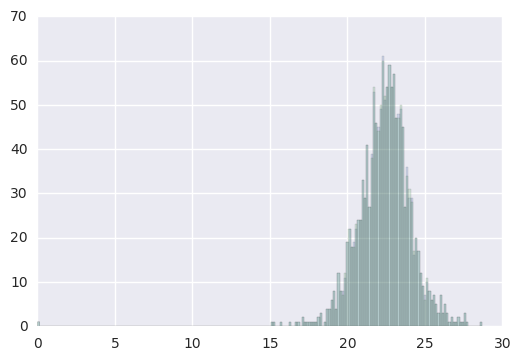

In [113]:
plt.hist(custom_wmd, bins=200, alpha=0.2)
plt.hist(gensim_wmd, bins=200, alpha=0.2)
plt.show()

(15, 30)

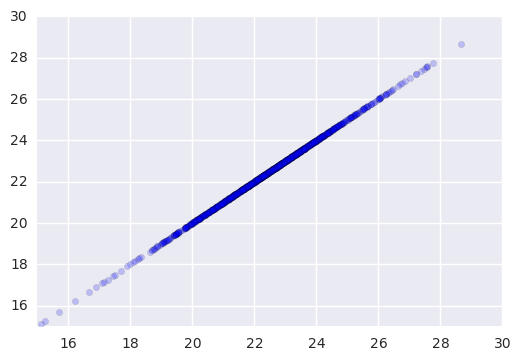

In [116]:
plt.scatter(custom_wmd, gensim_wmd, alpha=0.2)
plt.xlim([15,30])
plt.ylim([15,30])

In [89]:
index = np.hstack((np.where(gensim_wmd<12.5)[0], np.where(gensim_wmd>1)[0]))

In [92]:
index

array([   0,    1,    2, ..., 1391, 1392, 1393])

In [94]:
gensim_wmd.shape

(1394,)

In [166]:
for c1 in tqdm(contexts):
    for c2 in contexts:
        alignement_cos_metric_contexts(c1.split(), c2.split(), 
                        sum_init=np.inf,
                        comparison=operator.lt,
                        metric=euclidean_distances)

  0%|          | 1/1100 [00:07<2:13:57,  7.31s/it]


KeyboardInterrupt: 

In [152]:
%time
for c in contexts:
#     print(c)
    alignement_cos_metric_contexts(c1, c, 
                        sum_init=np.inf,
                        comparison=operator.lt,
                        metric=euclidean_distances),

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 21.7 µs


In [162]:
p1 = " ".join(contexts[:100])
p2 = " ".join(contexts[100:200])

In [163]:
alignement_cos_metric_contexts(p1, p2, 
                        sum_init=np.inf,
                        comparison=operator.lt,
                        metric=euclidean_distances)

KeyboardInterrupt: 

In [164]:
model.wmdistance(p1.split(), p2.split())

11.474344154244939

In [167]:
for c1 in tqdm(contexts):
    for c2 in contexts:
        model.wmdistance(c1.split(), c2.split())

  1%|          | 6/1100 [00:10<31:06,  1.71s/it]


KeyboardInterrupt: 

In [103]:
euclidean_distances(model['mis'], model['see'])

/media/cdata-work/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/media/cdata-work/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 16.19408607]], dtype=float32)

In [90]:
gensim_wmd[index].shape

(2782,)

In [64]:
gensim_wmd

array([  0.        ,   7.4236916 ,   9.14308616, ...,   9.29879584,
        10.40469048,   6.70222648])